<a href="https://colab.research.google.com/github/VEERUPAKSHAYYA/e1/blob/main/Machine_Learning_Project_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Machine Learning Internship")
print("Machine Learning Project On Human Acitivity Detection")

Machine Learning Internship
Machine Learning Project On Human Acitivity Detection


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

test  = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/test.csv")  
train = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/train.csv") 

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.Activity.value_counts()

WALKING               209
STANDING              179
LAYING                164
WALKING_UPSTAIRS      159
WALKING_DOWNSTAIRS    145
SITTING               143
Name: Activity, dtype: int64

In [5]:
train.shape,test.shape

((999, 563), (999, 563))

In [6]:
test.Activity.value_counts()

WALKING               185
LAYING                183
STANDING              178
SITTING               170
WALKING_UPSTAIRS      149
WALKING_DOWNSTAIRS    134
Name: Activity, dtype: int64

In [7]:
# suffling data 
from sklearn.utils import shuffle

test  = shuffle(test)
train = shuffle(train)

In [8]:
# separating data inputs and output lables 
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values


In [9]:
# encoding labels 
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

# encoding test labels 
encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)

In [10]:
# applying supervised neural network using multi-layer preceptron 
import sklearn.neural_network as nn 
mlpSGD  =  nn.MLPClassifier(hidden_layer_sizes=(90,), max_iter=1000 , alpha=1e-4, solver='sgd' , verbose=10 , tol=1e-19 , random_state=1 , learning_rate_init=0.001)

In [11]:
mlpADAM =  nn.MLPClassifier(hidden_layer_sizes=(90,), max_iter=1000 , alpha=1e-4, solver='adam' , verbose=10, tol=1e-19 , random_state=1, learning_rate_init=0.001) 

In [12]:
mlpLBFGS =  nn.MLPClassifier(hidden_layer_sizes=(90,) , max_iter=1000 , alpha=1e-4, solver='lbfgs' , verbose=10 , tol=1e-19 , random_state=1, learning_rate_init=0.001) 

In [13]:
nnModelSGD  = mlpSGD.fit(trainData , trainLabelE)

Iteration 1, loss = 2.15867931
Iteration 2, loss = 1.87885367
Iteration 3, loss = 1.66740872
Iteration 4, loss = 1.51260435
Iteration 5, loss = 1.37217884
Iteration 6, loss = 1.27798825
Iteration 7, loss = 1.20863439
Iteration 8, loss = 1.14470364
Iteration 9, loss = 1.08988403
Iteration 10, loss = 1.04101019
Iteration 11, loss = 0.99802145
Iteration 12, loss = 0.95971344
Iteration 13, loss = 0.92569494
Iteration 14, loss = 0.89431673
Iteration 15, loss = 0.86491592
Iteration 16, loss = 0.83788853
Iteration 17, loss = 0.81377797
Iteration 18, loss = 0.78933803
Iteration 19, loss = 0.76811769
Iteration 20, loss = 0.74768184
Iteration 21, loss = 0.72847645
Iteration 22, loss = 0.71047035
Iteration 23, loss = 0.69351112
Iteration 24, loss = 0.67691445
Iteration 25, loss = 0.66202085
Iteration 26, loss = 0.64664283
Iteration 27, loss = 0.63274689
Iteration 28, loss = 0.61939172
Iteration 29, loss = 0.60690399
Iteration 30, loss = 0.59356740
Iteration 31, loss = 0.58185930
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [14]:
nnModelSGD  = mlpLBFGS.fit(trainData , trainLabelE)
nnModelSGD

MLPClassifier(hidden_layer_sizes=(90,), max_iter=1000, random_state=1,
              solver='lbfgs', tol=1e-19, verbose=10)

In [15]:
nnModelADAM = mlpADAM.fit(trainData , trainLabelE)

Iteration 1, loss = 1.74574075
Iteration 2, loss = 1.15096039
Iteration 3, loss = 0.88815232
Iteration 4, loss = 0.71151000
Iteration 5, loss = 0.59289581
Iteration 6, loss = 0.49971645
Iteration 7, loss = 0.43198619
Iteration 8, loss = 0.37934114
Iteration 9, loss = 0.33396133
Iteration 10, loss = 0.29657179
Iteration 11, loss = 0.26538725
Iteration 12, loss = 0.24221588
Iteration 13, loss = 0.22417512
Iteration 14, loss = 0.20251948
Iteration 15, loss = 0.18893162
Iteration 16, loss = 0.18484087
Iteration 17, loss = 0.17489641
Iteration 18, loss = 0.15338621
Iteration 19, loss = 0.14125703
Iteration 20, loss = 0.13132854
Iteration 21, loss = 0.12222948
Iteration 22, loss = 0.11373654
Iteration 23, loss = 0.10879193
Iteration 24, loss = 0.09961407
Iteration 25, loss = 0.09672012
Iteration 26, loss = 0.09023280
Iteration 27, loss = 0.08718784
Iteration 28, loss = 0.08221395
Iteration 29, loss = 0.07712431
Iteration 30, loss = 0.07413943
Iteration 31, loss = 0.06900141
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

In [17]:
train = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/train.csv")
test = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/test.csv")
print('Train Data', train.shape,'\n', train.columns)
print('\nTest Data', test.shape)

Train Data (999, 563) 
 Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

Test Data (999, 563)


In [18]:
print('Train labels', train['Activity'].unique(), '\nTest Labels', test['Activity'].unique())

Train labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS'] 
Test Labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [19]:
pd.crosstab(train.subject, train.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,0,0,9,0,0,0


In [20]:
sub15 = train.loc[train['subject']==1]
sub15.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [21]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [22]:
train.subject.value_counts()

1    347
3    341
5    302
6      9
Name: subject, dtype: int64

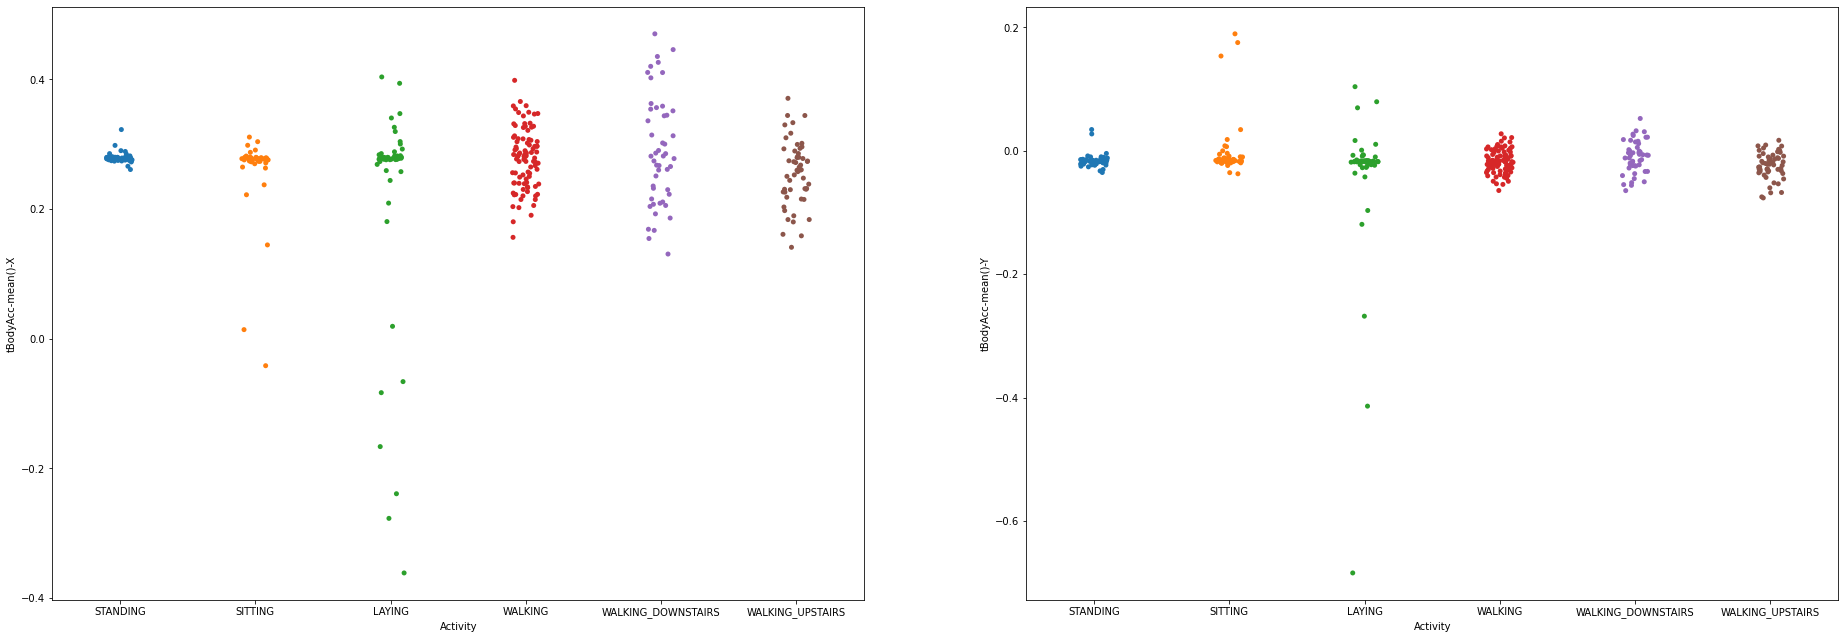

In [23]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,0], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,1], data=sub15, jitter=True)
plt.show()

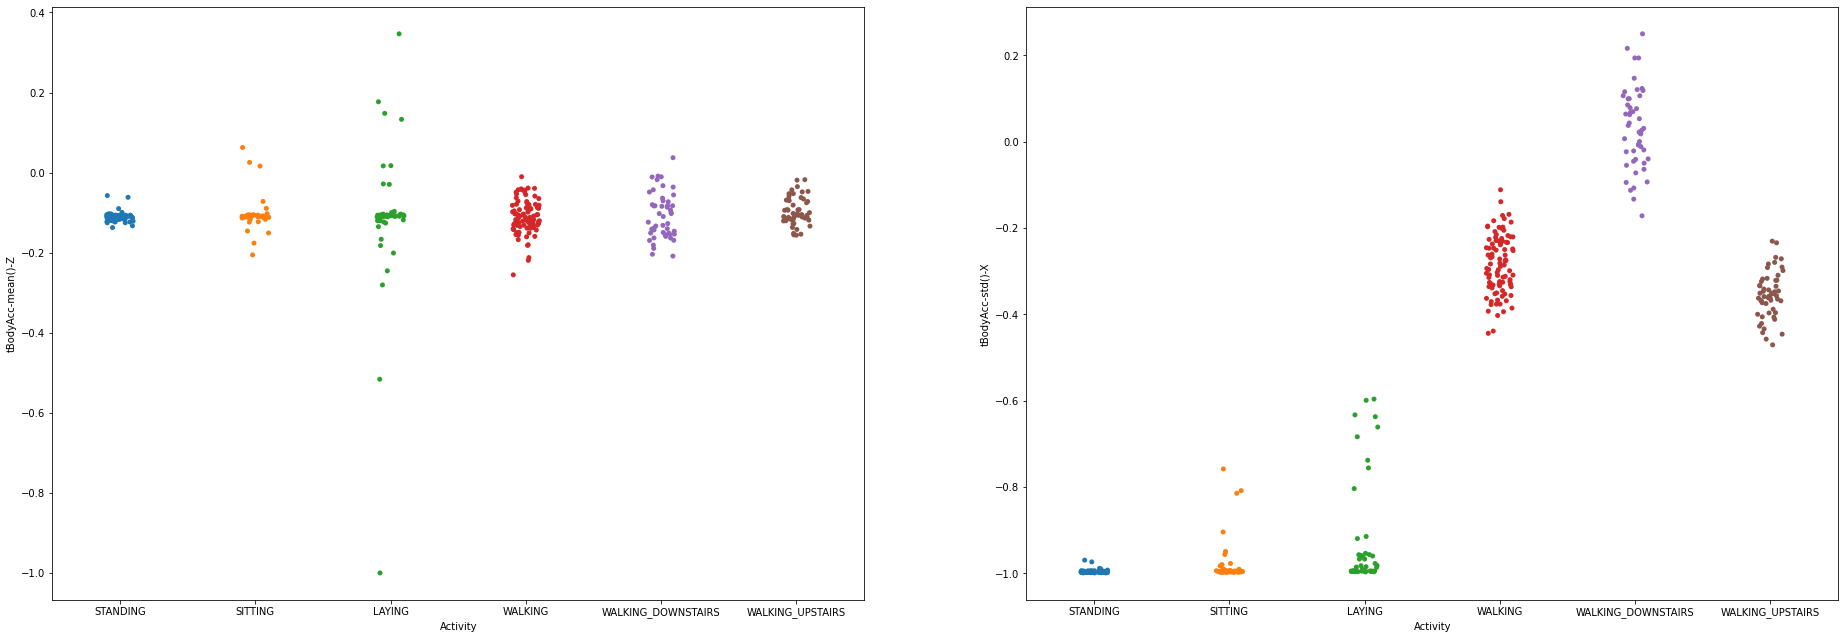

In [24]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,2], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,3], data=sub15, jitter=True)
plt.show()

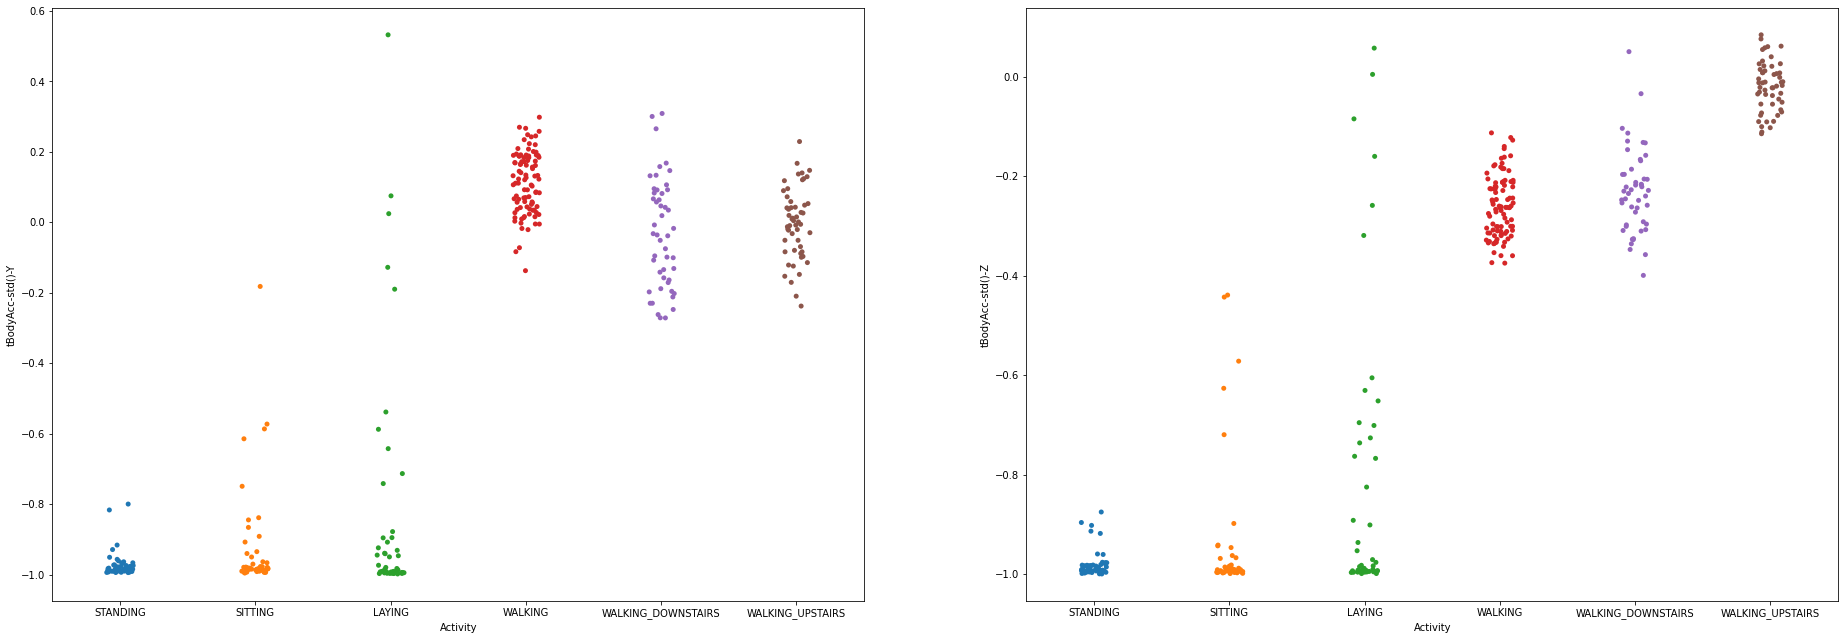

In [25]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,4], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,5], data=sub15, jitter=True)
plt.show()

In [26]:
import numpy as np 
import pandas as pd 

train_df = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/train.csv")
test_df = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/test.csv")
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [27]:
unique_activities = train_df.Activity.unique()
print("NUmber of unique activities: {}".format(len(unique_activities)))
replacer = {}
for i, activity in enumerate(unique_activities):
    replacer[activity] = i
train_df.Activity = train_df.Activity.replace(replacer)
test_df.Activity = test_df.Activity.replace(replacer)
train_df.head(10)


NUmber of unique activities: 6


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,0
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,0
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,0
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,0
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,0
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,0


In [28]:
def get_all_data():
    train_values = train_df.values
    test_values = test_df.values
    np.random.shuffle(train_values)
    np.random.shuffle(test_values)
    X_train = train_values[:, :-1]
    X_test = test_values[:, :-1]
    y_train = train_values[:, -1]
    y_test = test_values[:, -1]
    return X_train, X_test, y_train, y_test

In [29]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = get_all_data()



In [30]:
model = LogisticRegression(C=10)
model

LogisticRegression(C=10)

In [31]:
model = LogisticRegression()
model

LogisticRegression()

In [32]:
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [33]:
model.score(X_test, y_test)

0.8698698698698699

In [34]:
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = get_all_data()
pca = PCA(n_components=200) 
pca.fit(X_train) 
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8698698698698699

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8958958958958959

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical

In [37]:
X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
n_input = X_train.shape[1]
n_output = 6 
n_samples = X_train.shape[0] 
n_hidden_units = 40
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(Y_test.shape)

(999, 6)
(999, 6)


In [39]:
def create_model():
    model = Sequential()
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_output, activation="softmax"))
    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return model

In [40]:
estimator = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=False)
estimator.fit(X_train, Y_train)
print("Score: {}".format(estimator.score(X_test, Y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Score: 0.8888888955116272


In [41]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9129129129129129

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import keras.optimizers 
#from keras.optimizers import SGD,Adam

In [43]:
#Feature matrix
train_data = train.iloc[:,:561]
test_data = test.iloc[:,:561]

train_labels = train.iloc[:,562:]
test_labels = test.iloc[:,562:]
train_labelss=np.zeros((len(train_labels),6))
test_labelss=np.zeros((len(test_labels),6))

In [44]:
###### Random Forest #######
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values

encoder = LabelEncoder()

In [45]:
# encoding test labels 
encoder.fit(testLabel)
testLabelEncoder = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
trainLabelEncoder = encoder.transform(trainLabel)

rf = RandomForestClassifier(n_estimators=200,  n_jobs=4, min_samples_leaf=10)    
#train
rf.fit(trainData, trainLabelEncoder)

y_te_pred = rf.predict(testData)

acc = accuracy_score(testLabelEncoder, y_te_pred)
print("Random Forest Accuracy: %.5f" % (acc))


Random Forest Accuracy: 0.89389


In [46]:
##### K-Nearest Neighbors ######
clf = KNeighborsClassifier(n_neighbors=24)

knnModel = clf.fit(trainData , trainLabelEncoder)
y_te_pred = clf.predict(testData)

acc = accuracy_score(testLabelEncoder, y_te_pred)
print("K-Nearest Neighbors Accuracy: %.5f" % (acc))

K-Nearest Neighbors Accuracy: 0.76476


In [47]:
import numpy as np
import pandas as pd
import time

In [48]:
print("Number of features in Train : ", train.shape[1])
print("Number of records  in Train : ",train.shape[0])
print("Number of features in Test  : ",test.shape[1])
print("Number of records  in Test  : ",test.shape[0])

trainData  = train.drop(['subject','Activity'] , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop(['subject','Activity'] , axis=1).values
testLabel = test.Activity.values

print("Train Data shape  : ",trainData.shape)
print("Train Label shape : ",trainLabel.shape)
print("Test Data  shape  : ",testData.shape)
print("Test Label shape  : ",testLabel.shape)

print("Label examples: ")
print(np.unique(trainLabel))

Number of features in Train :  563
Number of records  in Train :  999
Number of features in Test  :  563
Number of records  in Test  :  999
Train Data shape  :  (999, 561)
Train Label shape :  (999,)
Test Data  shape  :  (999, 561)
Test Label shape  :  (999,)
Label examples: 
['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [49]:
from sklearn import preprocessing
from sklearn import utils

ltrain = preprocessing.LabelEncoder()
ltest = preprocessing.LabelEncoder()

trainLabel = ltrain.fit_transform(trainLabel)
testLabel  = ltest.fit_transform(testLabel)

print(np.unique(trainLabel))
print(np.unique(testLabel))
print("Train Label shape : ",trainLabel.shape)
print("Test Label shape  : ",testLabel.shape)
print(utils.multiclass.type_of_target(testLabel))

[0 1 2 3 4 5]
[0 1 2 3 4 5]
Train Label shape :  (999,)
Test Label shape  :  (999,)
multiclass


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle

In [51]:
t0 = time.clock()
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(6),
              scoring='accuracy')
# Before training the data it is convenient to shuffle the data in training
np.random.seed(1)
print("Labels before Shuffle",testLabel[0:5])
testData,testLabel = shuffle(testData,testLabel)
trainData,trainLabel = shuffle(trainData,trainLabel)
print("Labels after Shuffle",testLabel[0:5])

Labels before Shuffle [2 2 2 2 2]
Labels after Shuffle [1 5 5 0 3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


In [52]:
# train and fit data in the model
rfecv.fit(trainData, trainLabel)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Processing time sec ",time.clock() - t0)


Optimal number of features : 175
Processing time sec  279.28853100000003


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


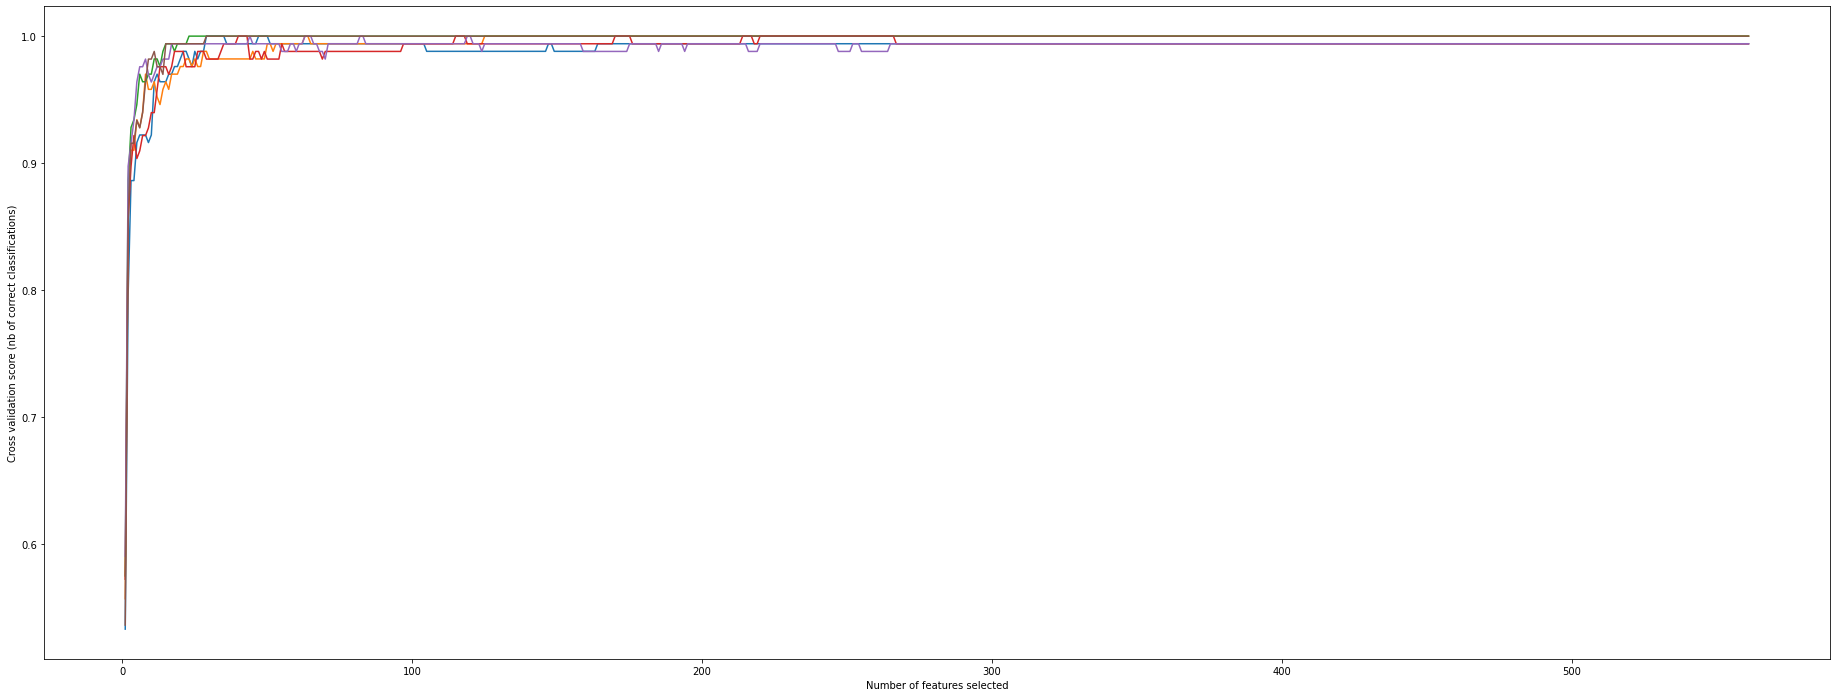

In [53]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(32,12))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [54]:
print('Accuracy of the SVM model on test data is ', rfecv.score(testData,testLabel) )
print('Ranking of features starting from the best estimated \n',rfecv.ranking_)
# if we mask the features to get only the best we get this
best_features = []
for ix,val in enumerate(rfecv.support_):
    if val==True:
        best_features.append(testData[:,ix])

Accuracy of the SVM model on test data is  0.8728728728728729
Ranking of features starting from the best estimated 
 [281 338 293   1   1 203   1   1 184   1 224 247 128 135 296 131  67 214
 236 100   1 169   1   1 138 142  76 252   1  30   1   1   1   1 200  19
   1   1   1   1   1   1  79 300 269 149 309 278 130   1   1  52   1   1
 126   1   1   1   9 332 246  91   1   1   1   1   1   1   1   1   1   4
  29   1   1  61  81   1   2  73 257  60   1  54  32 265  96  23 207   1
  14  99  27   1 105 187 231 223 365 150   1 111   1   1   1  66   1   1
   1  83  36   5   1 124  20 204   1   1   1   1 228 103 107 154 194 256
 234 129 163   1 229 198 201 284 137 239 242 305 294 148  34 123   1   1
   1   1  44   1   1  13  72 144   1  15  84 152   1   1   1   1 274 336
  59 134 195 230 156 147 244  82 161   1 164 290 276 255 329 352 363  68
  22 217   1   1   1   1   1   1   1   1 132   1   1   1  53  93   1   1
   1   1 122   1  43   1 162 106 178 222  49   1   1  86  41 114   1  33
   1 14

In [55]:
import pandas as pd
#from pd import scatter_matrix
visualize = pd.DataFrame(np.asarray(best_features).T)
print(visualize.shape)

(999, 175)


In [56]:
import numpy as np # linear algebra
import pandas as pd 
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer

In [57]:
train = shuffle(train)
test = shuffle(test)

In [58]:
train_features = train.iloc[:,:562]
test_features = test.iloc[:,:562]

binarizer = LabelBinarizer().fit(train['Activity'])
train_labels = binarizer.transform(train.Activity)
test_labels = binarizer.transform(test.Activity)

In [59]:
def weight_variable(shape):
    
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def bias_variable(shape):
    
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def add_layer(inputs, input_size, output_size, activation=None):
    
    W = weight_variable([input_size, output_size])
    b = bias_variable([output_size])
    wxb = tf.matmul(inputs, W) + b
    if activation:
        
        return activation(wxb)
    
    else:
        
        return wxb

In [60]:
#seperating class label from the dataset

trainLabels= train.Activity.values
trainData=train.drop("Activity",axis=1).values

testLabels= test.Activity.values
testData=test.drop("Activity",axis=1).values

print("Class labels striped off the dataset")

Class labels striped off the dataset


In [61]:
#transforming non-numerical labels to numerical labels using sklearn.preprocessing.LabelEncoder

from sklearn import preprocessing
labelEncoder= preprocessing.LabelEncoder()

labelEncoder.fit(trainLabels)
trainLabelsE=labelEncoder.transform(trainLabels)

labelEncoder.fit(testLabels)
testLabelsE=labelEncoder.transform(testLabels)

print("Labels Transformed and Encoded")

Labels Transformed and Encoded


In [62]:
#applying k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier as knn
import numpy as np

knnScoreDistance=np.zeros(51)
knnScoreUniform=np.zeros(51)

for num in range(5,51):
    knnclf = knn(n_neighbors=num, weights='distance')
    knnModel = knnclf.fit(trainData , trainLabelsE)
    knnScoreDistance[num]=knnModel.score(testData  , testLabelsE )
    print("Testing  set score for KNN_Distance(k=%d): %f" %(num,knnScoreDistance[num]))
    
for num in range(5,51):
    knnclf = knn(n_neighbors=num, weights='uniform')
    knnModel = knnclf.fit(trainData , trainLabelsE)
    knnScoreUniform[num]=knnModel.score(testData  , testLabelsE )
    print("Testing  set score for KNN_Uniform(k=%d): %f" %(num,knnScoreUniform[num]))

Testing  set score for KNN_Distance(k=5): 0.767768
Testing  set score for KNN_Distance(k=6): 0.766767
Testing  set score for KNN_Distance(k=7): 0.766767
Testing  set score for KNN_Distance(k=8): 0.768769
Testing  set score for KNN_Distance(k=9): 0.760761
Testing  set score for KNN_Distance(k=10): 0.762763
Testing  set score for KNN_Distance(k=11): 0.767768
Testing  set score for KNN_Distance(k=12): 0.770771
Testing  set score for KNN_Distance(k=13): 0.773774
Testing  set score for KNN_Distance(k=14): 0.765766
Testing  set score for KNN_Distance(k=15): 0.766767
Testing  set score for KNN_Distance(k=16): 0.765766
Testing  set score for KNN_Distance(k=17): 0.766767
Testing  set score for KNN_Distance(k=18): 0.766767
Testing  set score for KNN_Distance(k=19): 0.765766
Testing  set score for KNN_Distance(k=20): 0.764765
Testing  set score for KNN_Distance(k=21): 0.763764
Testing  set score for KNN_Distance(k=22): 0.767768
Testing  set score for KNN_Distance(k=23): 0.766767
Testing  set scor

<function matplotlib.pyplot.show(*args, **kw)>

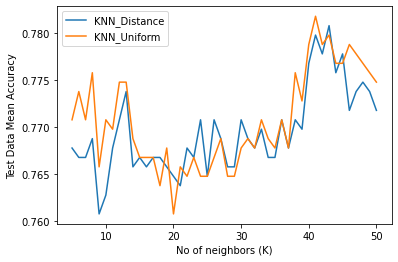

In [80]:
import matplotlib.pyplot as plt

x=np.array(range(5,51))

plt.plot(x,knnScoreDistance[5:])
plt.plot(x,knnScoreUniform[5:])
plt.xlabel("No of neighbors (K)")
plt.ylabel("Test Data Mean Accuracy")
plt.legend(['KNN_Distance','KNN_Uniform'])
plt.show

In [64]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.801802
Confusion matrix, without normalization
[[183   0   0   0   0   0]
 [  0 119  51   0   0   0]
 [  0  25 153   0   0   0]
 [  0   0   0 142   6  37]
 [  0   0   0  15 117   2]
 [  0   0   0  44  18  87]]


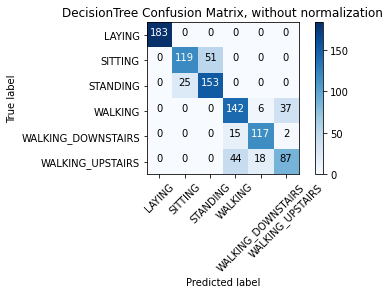

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

decsnTreeClf= DecisionTreeClassifier(criterion='entropy')
tree=decsnTreeClf.fit(trainData,trainLabelsE)
testPred=tree.predict(testData)

acc= accuracy_score(testLabelsE,testPred)
cfs = confusion_matrix(testLabelsE, testPred)

print("Accuracy: %f" %acc)

plt.figure()
class_names = labelEncoder.classes_
plot_confusion_matrix(cfs, classes=class_names,
                      title='DecisionTree Confusion Matrix, without normalization')

In [ ]:
decsnTreeClf= DecisionTreeClassifier()
tree=decsnTreeClf.fit(trainData,trainLabelsE)
testPred=tree.predict(testData)

acc= accuracy_score(testLabelsE,testPred)
cfs = confusion_matrix(testLabelsE, testPred)

print("Accuracy: %f" %acc)

plt.figure()
class_names = labelEncoder.classes_
plot_confusion_matrix(cfs, classes=class_names,
                      title='DecisionTree Confusion Matrix, without normalization')

In [ ]:
train_df.shape

In [ ]:
X, y = train_df.iloc[:, 0:len(train_df.columns) - 1], train_df.iloc[:, -1]

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
X_test, y_test = test_df.iloc[:, 0:len(test_df.columns) -1], test_df.iloc[:, -1]

In [ ]:
print(X_test)
print(y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score # for evaluation

In [ ]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(7), # because there are 6 different labels
    SVC(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [ ]:
names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = score_df.plot.bar()
ax.set_xticklabels(score_df.index, rotation=45, fontsize=10)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}

selector = GridSearchCV(SVC(), parameters, scoring='accuracy') # we only care about accuracy here
selector.fit(X, y)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

In [79]:
clf = SVC(kernel='linear', C=100).fit(X, y)
y_pred = clf.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))

Accuracy score: 0.8638638638638638
